In [161]:
import requests as r
from bs4 import BeautifulSoup
import csv
import copy
import misc
import data_processing
from importlib import reload
import pandas as pd
import numpy as np
reload(data_processing)
reload(misc)
pd.set_option('display.max_columns', 50)




## Remove Rows with too Many Missing Data

In [162]:
data = data_processing.read_data("raw_data.csv")

data = list(filter(lambda d: len(d.keys()) == len(list(filter(None, list(d.values())))) , data))
with open('training_data_clean.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=list(data[0].keys()))
    writer.writeheader()
    writer.writerows(data)
  



## Load and Clean Data Using Pandas (Removes Bad Characters in Column Titles, Removes Population Column)

In [163]:
import pandas as pd
import re
with open('training_data_clean.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    data = list(csv_reader)

df = pd.DataFrame(data)


columns = list(df.columns)
columns = list(map(lambda x: re.sub(r"^\s", "", x), columns))
columns = list(map(lambda x: re.sub(r"^\s", "", x), columns))
columns = list(map(lambda x: re.sub(r"\s$", "", x), columns))
columns = list(map(lambda x: re.sub(r"\s$", "", x), columns))
columns = list(map(lambda x: re.sub(r"\s?.?/$", "", x), columns))
df.columns = columns
population = df[columns[-2]]
df.drop(df[columns[-2]], axis = 1, inplace= True)
#df[columns[-2]] = population.iloc[:,0]
df

,State,Year,Party,County,Personal income (thousands of dollars),Net earnings by place of residence,Personal current transfer receipts,Income maintenance benefits,Unemployment insurance compensation,Retirement and other,"Dividends, interest, and rent",Per capita personal income,Per capita net earnings,Per capita personal current transfer receipts,Per capita income maintenance benefits,Per capita unemployment insurance compensation,Per capita retirement and other,"Per capita dividends, interest, and rent",Earnings by place of work,Wages and salaries,Supplements to wages and salaries,Employer contributions for employee pension and insurance funds,Employer contributions for government social insurance,Proprietors' income,Farm proprietors' income,Nonfarm proprietors' income,Per capita personal income (dollars)
0,Alabama,2008,R,Autauga,1771217,1167395,311777,30932,4413,276432,292045,33245,21912,5852,581,83,5189,5482,535920,386834,92695,64607,28088,56391,5556,50835,33245
1,Alabama,2008,R,Baldwin,6368395,3663354,1141954,70757,11210,1059987,1563087,36220,20835,6495,402,64,6029,8890,2872527,2113721,471345,316050,155295,287461,-5196,292657,36220
2,Alabama,2008,R,Barbour,718047,387634,199246,29367,1825,168054,131167,25822,13940,7165,1056,66,6043,4717,444673,325401,86487,61951,24536,32785,11143,21642,25822
3,Alabama,2008,R,Bibb,566499,347846,153075,16373,1767,134935,65578,24950,15320,6742,721,78,5943,2888,207599,148380,38996,27966,11030,20223,2715,17508,24950
4,Alabama,2008,R,Blount,1589266,1023611,349939,28949,2909,318081,215716,27855,17941,6133,507,51,5575,3781,470082,305719,75612,53249,22363,88751,15101,73650,27855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27921,Wyoming,1972,R,Sheridan,99818,63877,9921,540,361,9020,26020,5459,3493,543,30,20,493,1423,67415,42898,6053,4059,1994,18464,3189,15275,5459
27922,Wyoming,1972,R,Sublette,20152,15240,1078,27,33,1018,3834,5330,4031,285,7,9,269,1014,16341,9811,1149,674,475,5381,2212,3169,5330
27923,Wyoming,1972,R,Sweetwater,108800,87308,8703,364,272,8067,12789,5085,4081,407,17,13,377,598,99635,78304,8388,4197,4191,12943,2764,10179,5085
27924,Wyoming,1972,R,Teton,40955,28118,1536,36,199,1301,11301,7195,4940,270,6,35,229,1985,30396,19141,2279,1323,956,8976,640,8336,7195


## Adjust for inflation

In [164]:
for i in df.index:
    try:
        year = int(df.iloc[i,1])
        df.iloc[i, 4:] = df.iloc[i, 4:].map(lambda x: int(x) * misc.cpi_dict[year])
    except Exception as e:
        print(e)
        pass
df

,State,Year,Party,County,Personal income (thousands of dollars),Net earnings by place of residence,Personal current transfer receipts,Income maintenance benefits,Unemployment insurance compensation,Retirement and other,"Dividends, interest, and rent",Per capita personal income,Per capita net earnings,Per capita personal current transfer receipts,Per capita income maintenance benefits,Per capita unemployment insurance compensation,Per capita retirement and other,"Per capita dividends, interest, and rent",Earnings by place of work,Wages and salaries,Supplements to wages and salaries,Employer contributions for employee pension and insurance funds,Employer contributions for government social insurance,Proprietors' income,Farm proprietors' income,Nonfarm proprietors' income,Per capita personal income (dollars)
0,Alabama,2008,R,Autauga,2506669.03078,1652125.568571,441234.332332,43775.712665,6245.384068,391213.235598,413309.129877,47049.126069,31010.391049,8281.891585,822.245217,117.463602,7343.59799,7758.258659,758446.913605,547456.809557,131184.200359,91433.385108,39750.815251,79805.903689,7862.985244,71942.918445,47049.126069
1,Alabama,2008,R,Baldwin,9012706.247893,5184466.962876,1616120.851581,100137.013483,15864.662452,1500119.175645,2212118.433436,51259.417844,29486.194665,9191.880698,568.920099,90.574344,8532.386256,12581.34248,4065269.512984,2991388.954831,667058.815669,447281.585022,219777.230647,406821.742484,-7353.504559,414175.247043,51259.417844
2,Alabama,2008,R,Barbour,1016197.438001,548588.988858,281977.746209,41560.886908,2582.78403,237834.075271,185630.702935,36543.917382,19728.224316,10140.080863,1494.476677,93.404792,8552.199393,6675.612202,629311.95778,460515.345824,122398.488985,87674.54983,34723.939156,46398.122971,15769.842436,30628.280535,36543.917382
3,Alabama,2008,R,Bibb,801723.052154,492280.051332,216635.433087,23171.464615,2500.701031,190963.267442,92807.567735,35309.841944,21681.23361,9541.441057,1020.376595,110.387482,8410.676981,4087.167276,293799.113333,209990.955816,55188.080017,39578.157908,15609.92211,28620.0775,3842.333502,24777.743998,35309.841944
4,Alabama,2008,R,Blount,2249167.58583,1448638.982838,495242.115428,40969.323224,4116.886983,450155.905222,305286.487564,39421.06803,25390.536045,8679.569565,717.518632,72.17643,7889.874502,5350.96242,665271.387598,432660.904576,107007.926615,75359.269485,31648.65713,125602.556407,21371.299527,104231.25688,39421.06803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27921,Wyoming,1972,R,Sheridan,727625.460191,465632.766842,72319.34311,3936.341627,2631.517273,65751.484211,189673.350239,39793.498038,25462.298708,3958.210191,218.685646,145.790431,3593.734115,10372.989139,491423.094019,312705.894641,44123.473828,29588.167895,14535.305933,134593.72555,23246.284163,111347.441388,39793.498038
27922,Wyoming,1972,R,Sublette,146898.437895,111092.308134,7858.104211,196.817081,240.554211,7420.732919,27948.02555,38853.149761,29384.061292,2077.513636,51.026651,65.605694,1960.881292,7391.574833,119118.07134,71517.495742,8375.660239,4913.137512,3462.522727,39224.915359,16124.421627,23100.493732,38853.149761
27923,Wyoming,1972,R,Sweetwater,793099.942584,636433.545837,63440.705885,2653.385837,1982.749856,58804.570191,93225.690861,37067.216986,29748.537368,2966.835263,123.921866,94.76378,2748.149617,4359.133876,726291.477751,570798.693971,61144.506603,30594.121866,30550.384737,94348.277177,20148.237512,74200.039665,37067.216986
27924,Wyoming,1972,R,Teton,298542.354306,204966.766411,11196.705072,262.422775,1450.614785,9483.667512,82378.882823,52448.107416,36010.236364,1968.170813,43.737129,255.133254,1669.300431,14469.700239,221572.296459,139528.731627,16612.819569,9644.036986,6968.782584,65430.745263,4665.29378,60765.451483,52448.107416


## Add Popultation Column Back

In [165]:
df[columns[-2]] = population.iloc[:,0]
df

,State,Year,Party,County,Personal income (thousands of dollars),Net earnings by place of residence,Personal current transfer receipts,Income maintenance benefits,Unemployment insurance compensation,Retirement and other,"Dividends, interest, and rent",Per capita personal income,Per capita net earnings,Per capita personal current transfer receipts,Per capita income maintenance benefits,Per capita unemployment insurance compensation,Per capita retirement and other,"Per capita dividends, interest, and rent",Earnings by place of work,Wages and salaries,Supplements to wages and salaries,Employer contributions for employee pension and insurance funds,Employer contributions for government social insurance,Proprietors' income,Farm proprietors' income,Nonfarm proprietors' income,Per capita personal income (dollars),Population (persons)
0,Alabama,2008,R,Autauga,2506669.03078,1652125.568571,441234.332332,43775.712665,6245.384068,391213.235598,413309.129877,47049.126069,31010.391049,8281.891585,822.245217,117.463602,7343.59799,7758.258659,758446.913605,547456.809557,131184.200359,91433.385108,39750.815251,79805.903689,7862.985244,71942.918445,47049.126069,53277
1,Alabama,2008,R,Baldwin,9012706.247893,5184466.962876,1616120.851581,100137.013483,15864.662452,1500119.175645,2212118.433436,51259.417844,29486.194665,9191.880698,568.920099,90.574344,8532.386256,12581.34248,4065269.512984,2991388.954831,667058.815669,447281.585022,219777.230647,406821.742484,-7353.504559,414175.247043,51259.417844,175827
2,Alabama,2008,R,Barbour,1016197.438001,548588.988858,281977.746209,41560.886908,2582.78403,237834.075271,185630.702935,36543.917382,19728.224316,10140.080863,1494.476677,93.404792,8552.199393,6675.612202,629311.95778,460515.345824,122398.488985,87674.54983,34723.939156,46398.122971,15769.842436,30628.280535,36543.917382,27808
3,Alabama,2008,R,Bibb,801723.052154,492280.051332,216635.433087,23171.464615,2500.701031,190963.267442,92807.567735,35309.841944,21681.23361,9541.441057,1020.376595,110.387482,8410.676981,4087.167276,293799.113333,209990.955816,55188.080017,39578.157908,15609.92211,28620.0775,3842.333502,24777.743998,35309.841944,22705
4,Alabama,2008,R,Blount,2249167.58583,1448638.982838,495242.115428,40969.323224,4116.886983,450155.905222,305286.487564,39421.06803,25390.536045,8679.569565,717.518632,72.17643,7889.874502,5350.96242,665271.387598,432660.904576,107007.926615,75359.269485,31648.65713,125602.556407,21371.299527,104231.25688,39421.06803,57055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27921,Wyoming,1972,R,Sheridan,727625.460191,465632.766842,72319.34311,3936.341627,2631.517273,65751.484211,189673.350239,39793.498038,25462.298708,3958.210191,218.685646,145.790431,3593.734115,10372.989139,491423.094019,312705.894641,44123.473828,29588.167895,14535.305933,134593.72555,23246.284163,111347.441388,39793.498038,18285
27922,Wyoming,1972,R,Sublette,146898.437895,111092.308134,7858.104211,196.817081,240.554211,7420.732919,27948.02555,38853.149761,29384.061292,2077.513636,51.026651,65.605694,1960.881292,7391.574833,119118.07134,71517.495742,8375.660239,4913.137512,3462.522727,39224.915359,16124.421627,23100.493732,38853.149761,3781
27923,Wyoming,1972,R,Sweetwater,793099.942584,636433.545837,63440.705885,2653.385837,1982.749856,58804.570191,93225.690861,37067.216986,29748.537368,2966.835263,123.921866,94.76378,2748.149617,4359.133876,726291.477751,570798.693971,61144.506603,30594.121866,30550.384737,94348.277177,20148.237512,74200.039665,37067.216986,21395
27924,Wyoming,1972,R,Teton,298542.354306,204966.766411,11196.705072,262.422775,1450.614785,9483.667512,82378.882823,52448.107416,36010.236364,1968.170813,43.737129,255.133254,1669.300431,14469.700239,221572.296459,139528.731627,16612.819569,9644.036986,6968.782584,65430.745263,4665.29378,60765.451483,52448.107416,5692


## Normalize Data

In [166]:
for column in df.columns:
    try:
        if column != "Year":
            df[column] = df[column].map(lambda x: int(x))
            x_max = max(list(df[column]))
            x_min = min(list(df[column]))
            df[column] = df[column].map(lambda x: (x - x_min)/(x_max - x_min))
    except Exception as e:
        print(e)
df.to_csv("training_data_clean.csv")

invalid literal for int() with base 10: 'Alabama'
invalid literal for int() with base 10: 'R'
invalid literal for int() with base 10: 'Autauga'


## PCA for Exploratory Data Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(27926, 24)


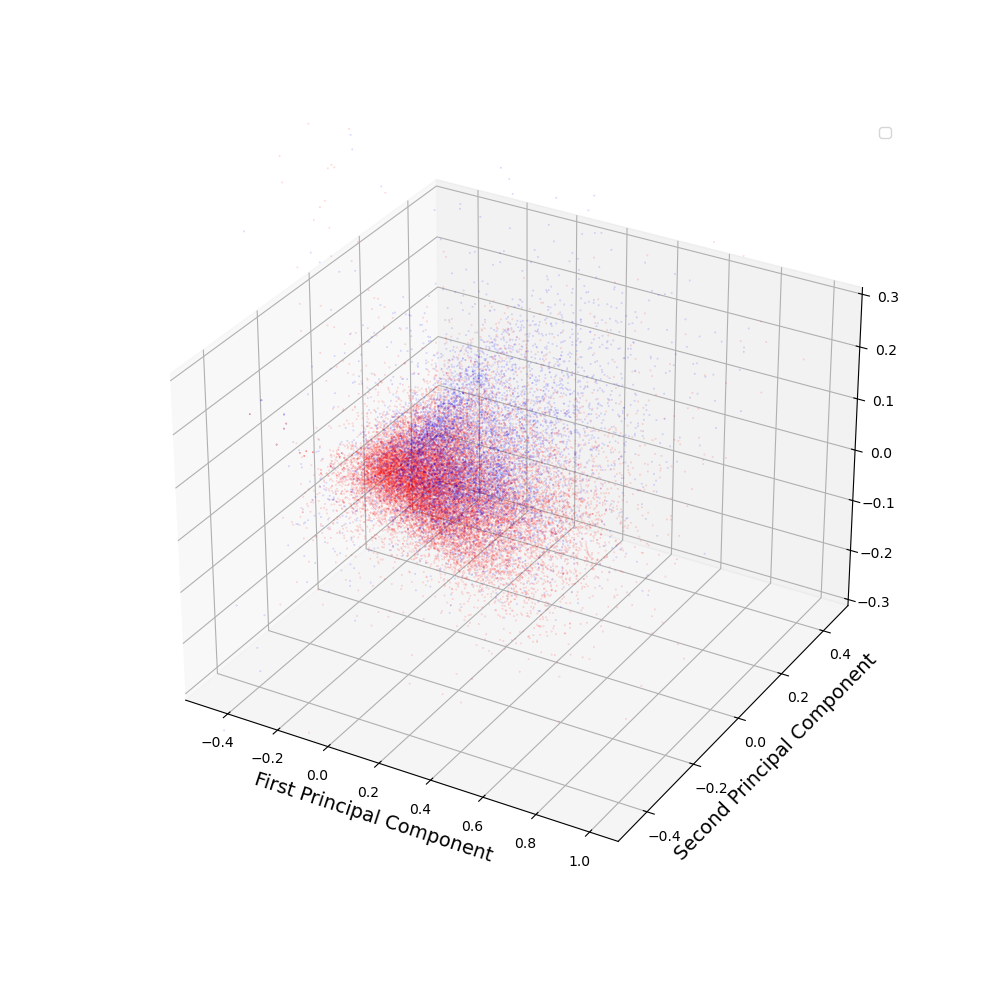

In [193]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib widget 

target, data = data_processing.read_data("training_data_clean.csv", mode = "List")
print(data.shape)

pca = PCA()
pca.fit(data)
#print(pca.explained_variance_ratio_)
transformed = pca.transform(data)
xs=transformed[:,0]
ys=transformed[:,1]
zs =transformed[:,2]


fig = plt.figure(figsize=(10, 10)) 
Axes3D(fig) 
ax = fig.add_subplot(projection='3d')
fig.patch.set_facecolor('white')

target = np.array(target)
indices = np.where(target == 'D')
ax.scatter(xs[indices], ys[indices], zs[indices], c="Blue", s=0.05, alpha = 0.3)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.3, 0.3)
indices = np.where(target == 'R')
ax.scatter(xs[indices], ys[indices], zs[indices], c="Red", s=0.05, alpha = 0.3)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()